# Visualizing Loans Awarded by Kiva

In this project I will visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using the data visualization library Seaborn, I'll explore the average loan amount by country using aggregated bar charts. I'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.



## Step 1: Importing Necessary Python Modules
The modules that I'll in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Step 2: Ingest The Data
I'll load **kiva_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.


In [4]:
df = pd.read_csv('kiva_data.csv')

df.head(2000)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
...,...,...,...,...
1995,500,Food Production/Sales,El Salvador,female
1996,800,Food Production/Sales,El Salvador,female
1997,1000,Food Production/Sales,El Salvador,female
1998,825,Food Production/Sales,El Salvador,female


## Step 3: Examine The Data



### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 




In [5]:
df.head(25)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


## Step 4: Bar Charts

Now to create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

The `f` variable gives us access to the figure and `ax` gives us access to the axes.

I'll use `sns.barplot()` with the following arguments:

- `data` set to `df`
- `x` set to `country`
- `y` set to `loan_amount`

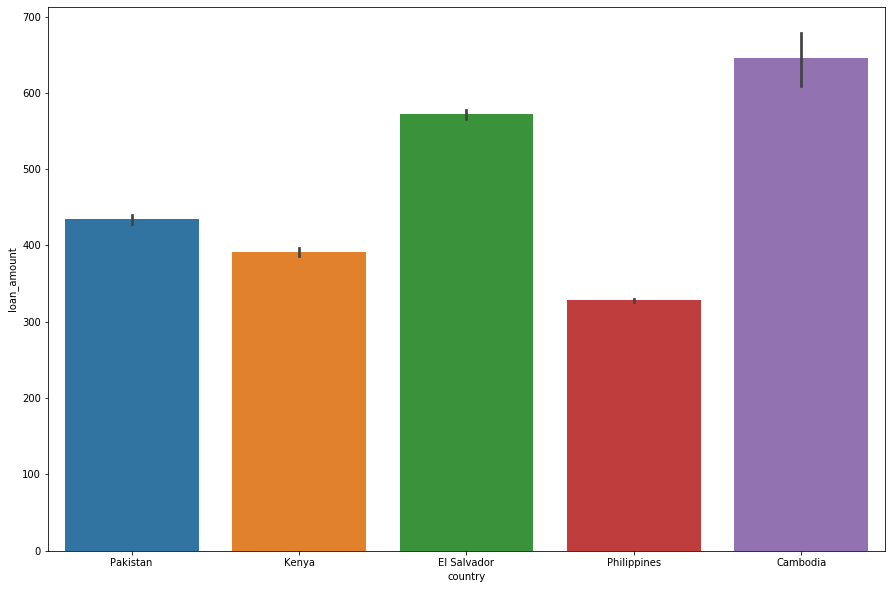

In [6]:
# Creates the figure, note: this syntax is used so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='country', y='loan_amount')

### Adding `$` units

I can use the following code to so that the `loan_amount` ticks on the y-axis begin with a `$` (units of USD). 

```python
import matplotlib.ticker as mtick
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
```

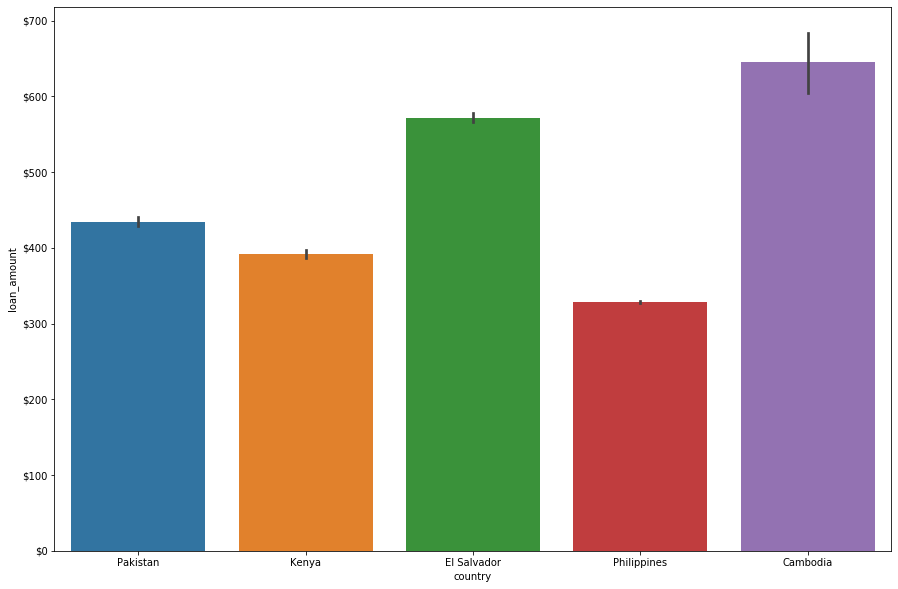

In [7]:
import matplotlib.ticker as mtick

# Creates the figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the data
sns.barplot(data=df, x="country", y = "loan_amount")

# Use part of the code above to format the y-axis ticks below this line
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)



## Step 5: Using `hue` In The Visualization

I can visualize even more data on one bar plot by visualizing the loan amount by country, and "nesting" by gender. This is done by adding the `hue` parameter to the `sns.barplot()` and setting it so that the visualization includes the nested category of gender.


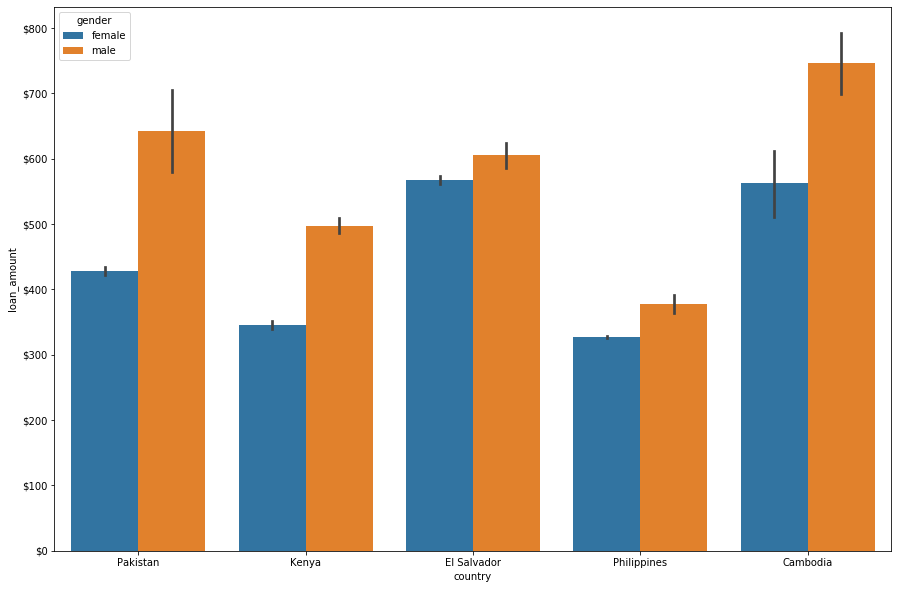

In [8]:
# Creates the figure, you're only using this syntax so you can modify the y-axis ticks below
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x="country", y="loan_amount", hue='gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

#### Insights so far:

On average, male recipients appear to receive larger loans from Kiva.

El Salvador is the country that has the *least* disparity in loan amounts awarded by gender.

## Step 6: Styling


Different color palettes can be set using `sns.set_palette()`. E.g. the Color Brewer qualitative color palettes:

- Set1
- Set2
- Set3
- Pastel1
- Pastel2
- Dark2
- Accent

More information on color palettes can be found here: <a href = "https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes" target = "_blank">qualitative color palettes in the Seaborn documentation.</a>


The plot background style can be set using `sns.set_style()`. Types of backgrounds include:
- whitegrid
- darkgrid
- white
- dark




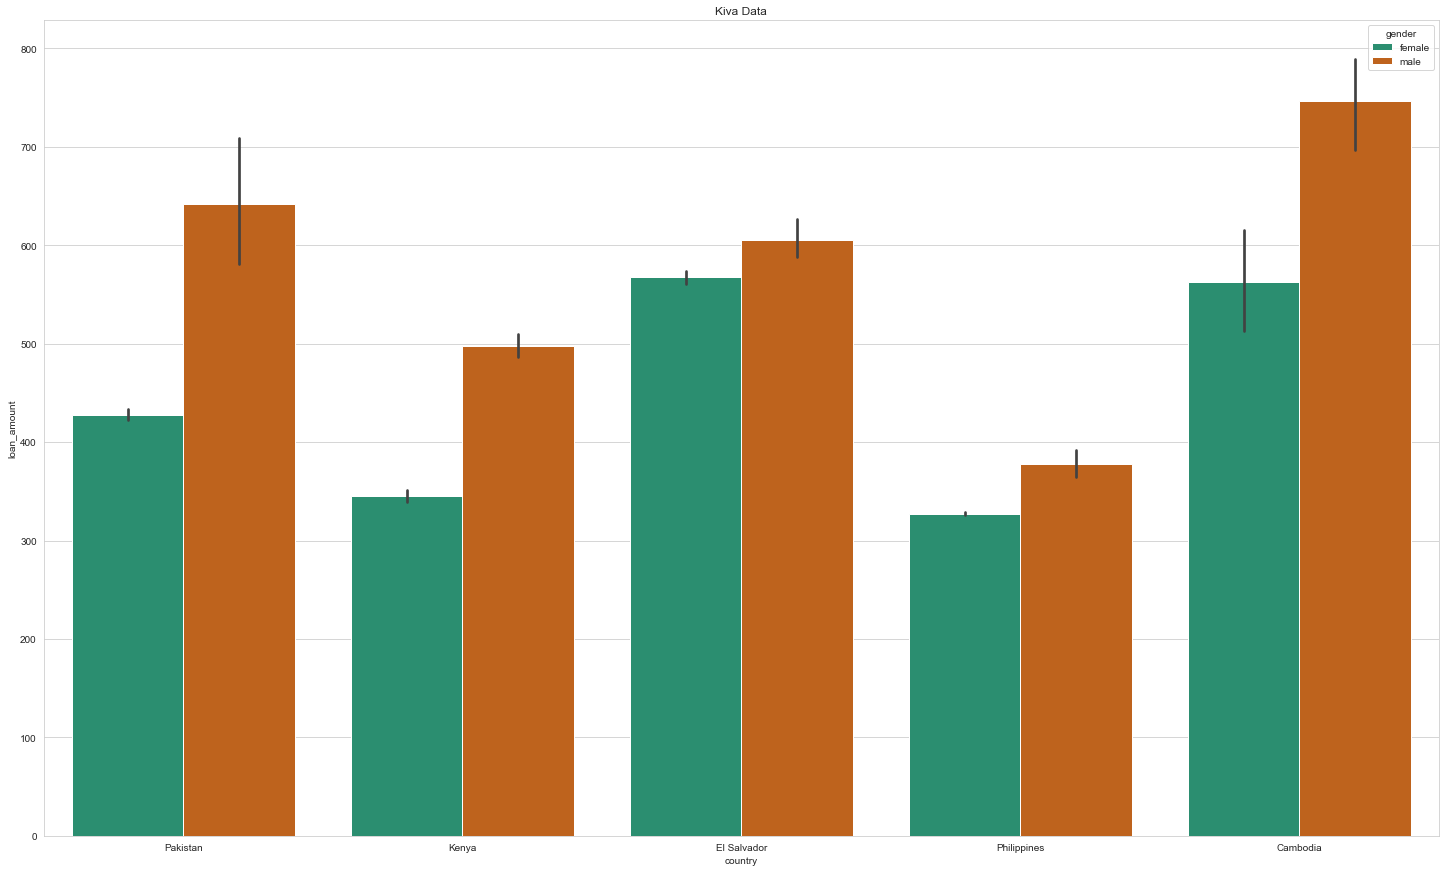

In [9]:
# Set color palette
sns.set_palette('Dark2')

# Set style
sns.set_style('whitegrid')

# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))
#f, ax = plt.subplots(figsize=(25, 15))
# Add a title
plt.title("Kiva Data")

# Use Seaborn to create the bar plot
sns.barplot(data=df, x="country", y="loan_amount", hue='gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# y axis formatting doesn't work for some reason?

## Step 7: Box Plots With Kiva Data

So far we have visualized the average size of loans by country using bar charts; now we can try to make a box plot to compare the distribution of loans by country.

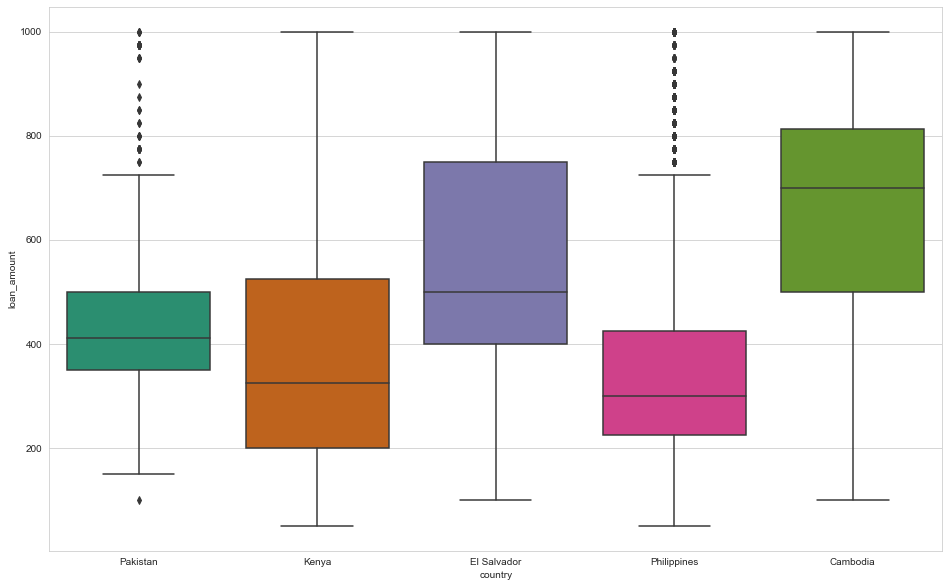

In [10]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=df, x='country', y='loan_amount')

plt.show()

#### Further insights:

Kenya has the widest distribution.

Cambodia is where one would be most likely to receive the largest loan amount.

## Step 8: Box Plot by Activity

Instead of visualizing the loan amount by *country*, we can use `sns.boxplot()` to plot the loan amount by *activity*.


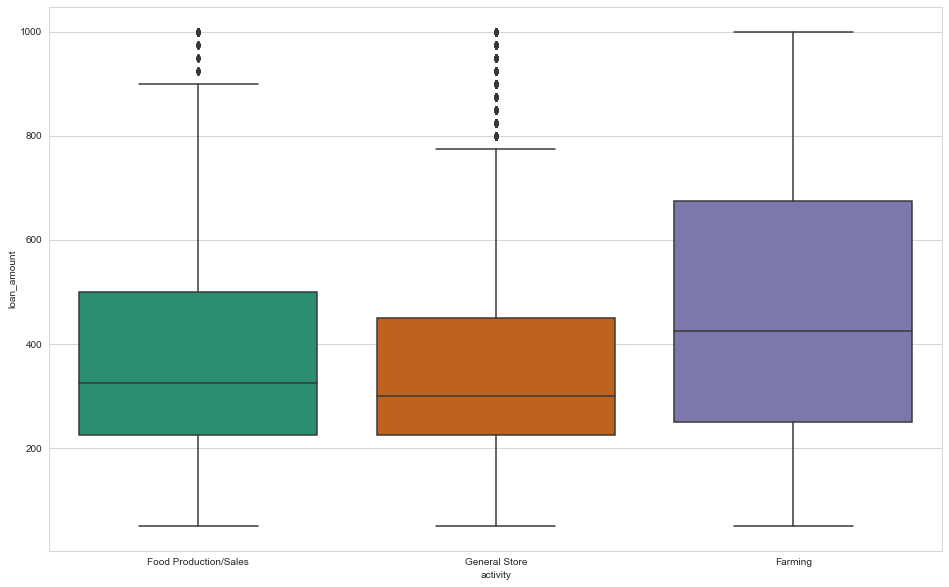

In [11]:
plt.figure(figsize=(16, 10))

sns.boxplot(data=df, x='activity', y='loan_amount')

plt.show()


#### Insight:

Something this graph reveals that the previous ones did not is that on average, farming projects receive higher loans, and also have a larger distribution.

## Step 9: Violin Plots

We can use nearly identical syntax (as we have used for box plots) to create violin plots. 

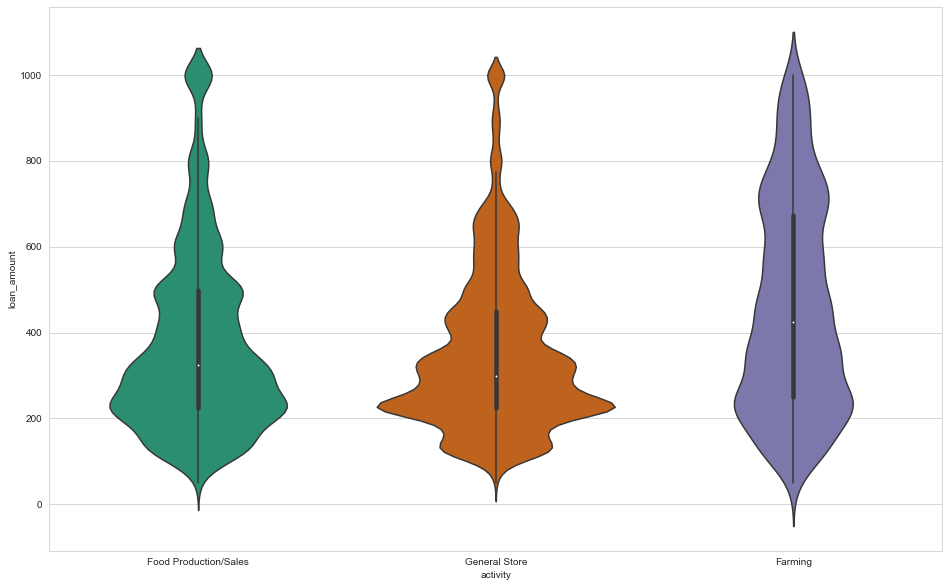

In [12]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=df, x="activity", y="loan_amount")

plt.show()

### Creating a violin plot that visualizes the distribution of loan amount by country.
Previously, I created a violin plot and plotted the data by _activity_. This time, I can create a violin plot that plots the data by _country_.



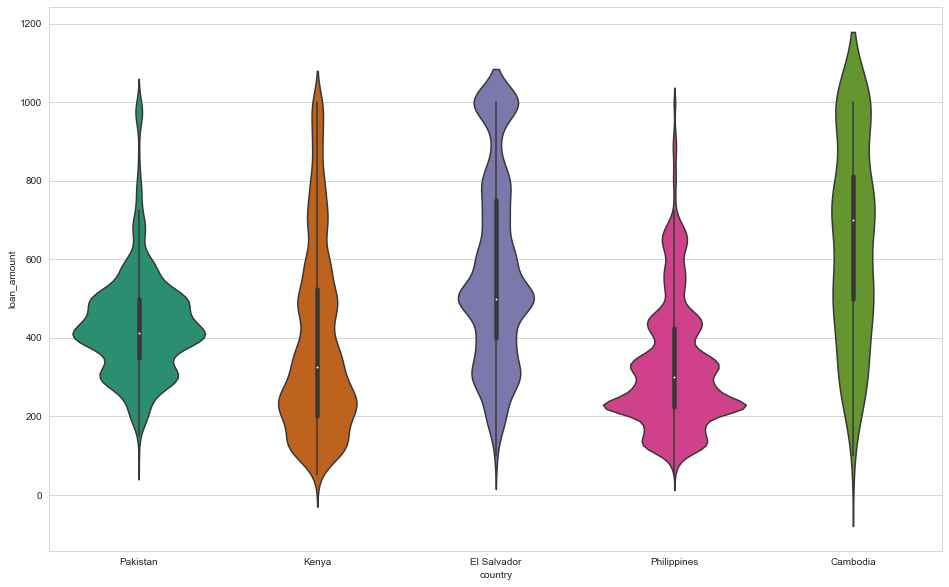

In [13]:
plt.figure(figsize=(16, 10))

sns.violinplot(data=df, x='country', y='loan_amount')

plt.show()

## Step 10: Split Violin Plots

The `hue` and `split` parameters can be used with `sns.violinplot()` to visualize the distribution of loan amount by country, split by gender. 



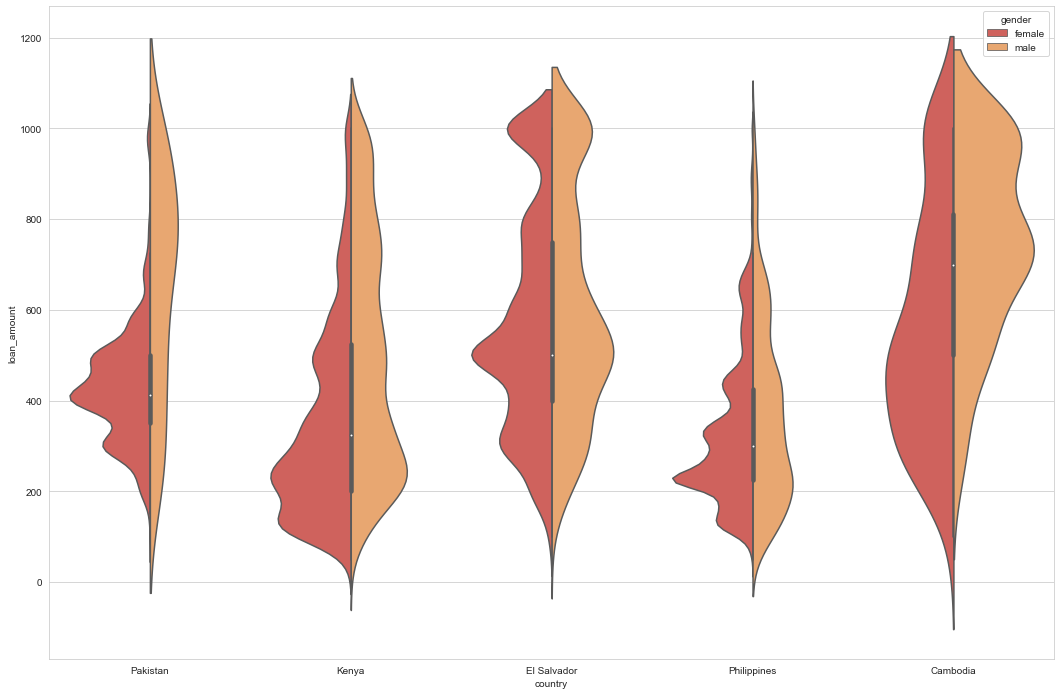

In [15]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")
plt.figure(figsize=(18, 12))

sns.violinplot(data=df, x="country", y = "loan_amount", hue="gender", split=True)
plt.show()

#### Insights:

Much higher amounts of loans are given to males in Pakistan and Cambodia, and the disparity is relatively less for El Salvador.